#TelecomX_LATAM

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
df= pd.read_json('TelecomX_Data.json')
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
df.shape

(7267, 6)

##Transformación


###Validación de customerID

In [6]:
import re

In [7]:
patron = r"^\d{4}-[A-Z]{5}$"


In [8]:
ids_invalidos = df[~df["customerID"].str.match(patron, na=False)]

ids_invalidos.shape


(0, 6)

Conclusión: El formato del identificador es consistente, no hay errores tipográficos ni estructurales, es confiable.

###Validación de situación (Churn)

In [9]:
pd.unique(df['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [10]:
(df["Churn"] == "").sum()

np.int64(224)

####Limpieza de espacios vacíos ""

In [11]:
import numpy as np

df["Churn"] = df["Churn"].replace("", np.nan)

In [12]:
pd.unique(df["Churn"])
df["Churn"].isna().sum()

np.int64(224)

In [13]:
pd.unique(df["Churn"])


array(['No', 'Yes', nan], dtype=object)

#####Eliminar registros que no indican la situación Churn

In [14]:
df_sin_churn_desconocido = df[df["Churn"].notna()]

In [15]:
df_sin_churn_desconocido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7043 non-null   object
 3   phone       7043 non-null   object
 4   internet    7043 non-null   object
 5   account     7043 non-null   object
dtypes: object(6)
memory usage: 385.2+ KB


In [16]:
df_sin_churn_desconocido.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###Validar datos dentro de customer

In [17]:
type(df_sin_churn_desconocido.loc[0, "customer"])

dict

In [18]:
df_sin_churn_desconocido['customer'].iloc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

####Verificar consistencia dentro del diccionario

In [19]:
keys_customer = df_sin_churn_desconocido["customer"].apply(
    lambda x: frozenset(x.keys())
)

keys_customer.unique()

array([frozenset({'tenure', 'SeniorCitizen', 'Partner', 'gender', 'Dependents'})],
      dtype=object)

####Desanidar customer

In [20]:
customer_df = pd.json_normalize(df_sin_churn_desconocido["customer"])

In [21]:
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
 4   tenure         7043 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 275.2+ KB


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [22]:
df_sin_churn_desconocido = pd.concat(
    [df_sin_churn_desconocido.drop(columns=["customer"]), customer_df],
    axis=1
)

In [23]:
pd.unique(df_sin_churn_desconocido["tenure"])


array([ 9.,  4., 13.,  3., 71., 63.,  7., 65., 54., 72.,  5., 56., 34.,
        1., 45., 50., 23., 55., 26., 69., 49., 66., 67., 20., 43., 59.,
       12., 27.,  2., 25., 29., 14., 35., 64., 39., 40., 11.,  6., 30.,
       70., 57., 58., 16., 32., 33., 10., 21., 37., 61., 15., 44., 22.,
       19., 47., 62., 46., 52.,  8., 60., 48., 28., 41., 53., 68., 31.,
       36., 17., 18., 51., 24., 42., 38.,  0., nan])

In [24]:
pd.unique(df_sin_churn_desconocido["SeniorCitizen"])

array([ 0.,  1., nan])

#####Limpieza

In [25]:
df_sin_churn_desconocido[
    ["SeniorCitizen", "Partner", "gender", "tenure", "Dependents"]
].isna().sum()

(
    df_sin_churn_desconocido[
        ["SeniorCitizen", "Partner", "gender", "tenure", "Dependents"]
    ].isna().mean() * 100
).round(2)



,0
SeniorCitizen,2.94
Partner,2.94
gender,2.94
tenure,2.94
Dependents,2.94


In [26]:
df_sin_churn_desconocido["gender"].isna().value_counts()


,count
gender,
False,7043
True,213


In [27]:
df_sin_churn_desconocido.loc[
    df_sin_churn_desconocido["gender"].isna(),
    "customerID"
].head()


,customerID
7043,9701-CDXHR
7044,9702-AIUJO
7045,9705-IOVQQ
7046,9705-ZJBCG
7047,9708-HPXWZ


In [28]:
df_sin_churn_desconocido = df_sin_churn_desconocido.dropna(
    subset=["gender", "Partner", "Dependents", "SeniorCitizen", "tenure"]
)
df_sin_churn_desconocido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7031
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerID     6830 non-null   object 
 1   Churn          6830 non-null   object 
 2   phone          6830 non-null   object 
 3   internet       6830 non-null   object 
 4   account        6830 non-null   object 
 5   gender         7043 non-null   object 
 6   SeniorCitizen  7043 non-null   float64
 7   Partner        7043 non-null   object 
 8   Dependents     7043 non-null   object 
 9   tenure         7043 non-null   float64
dtypes: float64(2), object(8)
memory usage: 605.3+ KB


###Validar datos de phone

In [29]:
df_sin_churn_desconocido.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,Yes,Yes,9.0
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,9.0
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,4.0
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,Yes,No,13.0
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,Yes,No,3.0


In [30]:
df_sin_churn_desconocido["phone"].iloc[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [31]:
type(df_sin_churn_desconocido.loc[0, "phone"])

dict

In [32]:
keys_phone = df_sin_churn_desconocido["phone"].apply(
    lambda x: frozenset(x.keys()) if isinstance(x, dict) else frozenset()
)

keys_phone.unique()


array([frozenset({'MultipleLines', 'PhoneService'}), frozenset()],
      dtype=object)

In [33]:
keys_phone.value_counts()


,count
phone,
"(MultipleLines, PhoneService)",6830
(),213


In [34]:
phone_df = pd.json_normalize(df_sin_churn_desconocido["phone"])


In [35]:
df_sin_churn_desconocido = pd.concat(
    [df_sin_churn_desconocido.drop(columns=["phone"]), phone_df],
    axis=1
)


In [36]:
df_sin_churn_desconocido[["PhoneService", "MultipleLines"]].isna().sum()


,0
PhoneService,213
MultipleLines,213


In [37]:
(
    df_sin_churn_desconocido[["PhoneService", "MultipleLines"]]
    .isna().mean() * 100
).round(2)


,0
PhoneService,3.02
MultipleLines,3.02


In [38]:
df_sin_churn_desconocido["PhoneService"] = (
    df_sin_churn_desconocido["PhoneService"].fillna("No")
)

df_sin_churn_desconocido["MultipleLines"] = (
    df_sin_churn_desconocido["MultipleLines"].fillna("No phone service")
)



In [39]:
df_sin_churn_desconocido[
    (df_sin_churn_desconocido["PhoneService"] == "No") &
    (df_sin_churn_desconocido["MultipleLines"] == "Yes")
].shape


(0, 11)

In [40]:
df_sin_churn_desconocido.head()

,customerID,Churn,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,Yes,Yes,9.0,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,9.0,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,4.0,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,Yes,No,13.0,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,Yes,No,3.0,Yes,No


###Validar para internet

In [41]:
df_sin_churn_desconocido["internet"].iloc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [42]:
keys_internet = df_sin_churn_desconocido["internet"].apply(
    lambda x: frozenset(x.keys()) if isinstance(x, dict) else frozenset()
)

keys_internet.unique()


array([frozenset({'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'InternetService'}),
       frozenset()], dtype=object)

In [43]:
keys_internet.value_counts()

,count
internet,
"(OnlineSecurity, StreamingTV, StreamingMovies, TechSupport, DeviceProtection, OnlineBackup, InternetService)",6830
(),213


In [44]:
internet_df = pd.json_normalize(
    df_sin_churn_desconocido["internet"],
    sep="_"
)


In [45]:
df_sin_churn_desconocido = pd.concat(
    [df_sin_churn_desconocido.drop(columns=["internet"]), internet_df],
    axis=1
)


In [46]:
df_sin_churn_desconocido.columns


Index(['customerID', 'Churn', 'account', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [47]:
df_sin_churn_desconocido.head()

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [48]:
internet_cols = internet_df.columns.tolist()

df_sin_churn_desconocido[internet_cols].isna().sum()

(df_sin_churn_desconocido[internet_cols].isna().mean() * 100).round(2)


,0
InternetService,3.02
OnlineSecurity,3.02
OnlineBackup,3.02
DeviceProtection,3.02
TechSupport,3.02
StreamingTV,3.02
StreamingMovies,3.02


In [49]:
df_sin_churn_desconocido["InternetService"] = (
    df_sin_churn_desconocido["InternetService"].fillna("No")
)

In [50]:
servicios = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

for col in servicios:
    df_sin_churn_desconocido[col] = (
        df_sin_churn_desconocido[col].fillna("No internet service")
    )

In [51]:
df_sin_churn_desconocido[
    (df_sin_churn_desconocido["InternetService"] == "No") &
    (df_sin_churn_desconocido["OnlineSecurity"] == "Yes")
].shape

(0, 17)

###Validación para account

In [52]:
df_sin_churn_desconocido["account"].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [53]:
account_df = pd.json_normalize(
    df_sin_churn_desconocido["account"],
    sep="_"
)

In [54]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          6830 non-null   object 
 1   PaperlessBilling  6830 non-null   object 
 2   PaymentMethod     6830 non-null   object 
 3   Charges_Monthly   6830 non-null   float64
 4   Charges_Total     6830 non-null   object 
dtypes: float64(1), object(4)
memory usage: 275.2+ KB


In [55]:
account_df["Charges_Total"] = pd.to_numeric(
    account_df["Charges_Total"],
    errors="coerce"
)

In [56]:
account_df[["Charges_Monthly", "Charges_Total"]].describe()

,Charges_Monthly,Charges_Total
count,6830.000000,6819.000000
mean,64.711947,2282.560001
std,30.095711,2266.680701
min,18.250000,18.800000
25%,35.450000,400.700000
50%,70.350000,1396.900000
75%,89.850000,3793.050000
max,118.750000,8684.800000


In [57]:
df_sin_churn_desconocido = pd.concat(
    [df_sin_churn_desconocido.drop(columns=["account"]), account_df],
    axis=1
)

In [58]:
account_cols = account_df.columns.tolist()

(df_sin_churn_desconocido[account_cols].isna().mean() * 100).round(2)

,0
Contract,3.02
PaperlessBilling,3.02
PaymentMethod,3.02
Charges_Monthly,3.02
Charges_Total,3.18


In [59]:
df_sin_churn_desconocido[
    df_sin_churn_desconocido["Charges_Monthly"].notna() &
    df_sin_churn_desconocido["Charges_Total"].isna()
].head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
945,1334-PDUKM,No,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1731,2460-NGXBJ,No,Female,0.0,Yes,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1906,2692-PFYTJ,No,Male,0.0,No,Yes,0.0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2025,2858-MOFSQ,Yes,Male,0.0,Yes,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2176,3049-SOLAY,Yes,Male,0.0,No,Yes,0.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN


In [60]:
mask_inconsistente = (
    df_sin_churn_desconocido["Charges_Monthly"].notna() &
    df_sin_churn_desconocido["Charges_Total"].isna()
)

mask_inconsistente.sum()

np.int64(11)

In [61]:
df_sin_churn_desconocido.loc[mask_inconsistente, "Charges_Total"] = (
    df_sin_churn_desconocido.loc[mask_inconsistente, "Charges_Monthly"] *
    df_sin_churn_desconocido.loc[mask_inconsistente, "tenure"]
)


In [62]:
for col in ["Contract", "PaperlessBilling", "PaymentMethod"]:
    df_sin_churn_desconocido[col] = df_sin_churn_desconocido[col].fillna("Unknown")

df_sin_churn_desconocido["Charges_Monthly"] = (
    df_sin_churn_desconocido["Charges_Monthly"]
    .fillna(df_sin_churn_desconocido["Charges_Monthly"].median())
)

df_sin_churn_desconocido["Charges_Total"] = (
    df_sin_churn_desconocido["Charges_Total"]
    .fillna(df_sin_churn_desconocido["Charges_Total"].median())
)


In [63]:
(df_sin_churn_desconocido[account_cols].isna().sum())


,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges_Monthly,0
Charges_Total,0


In [64]:
df_sin_churn_desconocido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


###Revisión de calidad

In [65]:
missing_abs = df_sin_churn_desconocido.isna().sum()
missing_pct = (df_sin_churn_desconocido.isna().mean() * 100).round(2)

pd.concat([missing_abs, missing_pct], axis=1).rename(
    columns={0: "NaN_count", 1: "NaN_%"}
)

,NaN_count,NaN_%
customerID,213,3.02
Churn,213,3.02
gender,0,0.00
SeniorCitizen,0,0.00
Partner,0,0.00
Dependents,0,0.00
tenure,0,0.00
PhoneService,0,0.00
MultipleLines,0,0.00
InternetService,0,0.00


In [66]:
df_sin_churn_desconocido = df_sin_churn_desconocido.dropna(
    subset=["customerID", "Churn"]
)

In [67]:
df_sin_churn_desconocido.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [68]:
df_sin_churn_desconocido.shape

(6830, 21)

In [69]:
quality_report = pd.DataFrame({
    "Dimension": ["Completeness", "Uniqueness", "Validity", "Consistency", "Accuracy", "Duplicates"],
    "Status": ["OK", "OK", "OK", "OK", "OK", "OK"]
})

quality_report


,Dimension,Status
0,Completeness,OK
1,Uniqueness,OK
2,Validity,OK
3,Consistency,OK
4,Accuracy,OK
5,Duplicates,OK


###Crear columna Cuentas Diarias

In [70]:
df_sin_churn_desconocido["Cuentas_Diarias"] = (
    df_sin_churn_desconocido["Charges_Monthly"] / 30
)

In [71]:
df_sin_churn_desconocido[["Charges_Monthly", "Cuentas_Diarias"]].head()


,Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [72]:
(df_sin_churn_desconocido["Cuentas_Diarias"] < 0).sum()

np.int64(0)

In [73]:
df_sin_churn_desconocido["Cuentas_Diarias"].describe()

,Cuentas_Diarias
count,6830.000000
mean,2.164902
std,0.989143
min,0.608333
25%,1.302083
50%,2.345000
75%,2.985000
max,3.958333


###🔧 Estandarización y transformación de datos

In [74]:
df_sin_churn_desconocido["PaperlessBilling"] = (
    df_sin_churn_desconocido["PaperlessBilling"].fillna(0)
)

In [75]:
df_sin_churn_desconocido["PaperlessBilling"].unique()

array(['Yes', 'No', 'Unknown'], dtype=object)

In [76]:
df_sin_churn_desconocido["MultipleLines"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [77]:
#Variables binarias (Yes/No ---> 1/0)
binarias = [
    "Churn",
    "Partner",
    "Dependents",
    "PaperlessBilling",
    "PhoneService",
    "MultipleLines"
]

In [78]:
map_binario = {"Yes": 1, "No": 0, "Unknown": 0, "No phone service": 0}

for col in binarias:
    df_sin_churn_desconocido[col] = (
        df_sin_churn_desconocido[col]
        .map(map_binario)
        .astype("Int64")
    )

In [79]:
#Estandarización de servicios dependientes de Internet
#No internet service --> No contratado--> 0
servicios_internet = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

In [80]:
map_servicios = {
    "Yes": 1,
    "No": 0,
    "No internet service": 0
}

for col in servicios_internet:
    df_sin_churn_desconocido[col] = (
        df_sin_churn_desconocido[col]
        .map(map_servicios)
        .astype("Int64")
    )

In [81]:
df_sin_churn_desconocido.dtypes

,0
customerID,object
Churn,Int64
gender,object
SeniorCitizen,float64
Partner,Int64
Dependents,Int64
tenure,float64
PhoneService,Int64
MultipleLines,Int64
InternetService,object


In [82]:
for col in binarias + servicios_internet:
    print(col, df_sin_churn_desconocido[col].unique())

Churn <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
Partner <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
Dependents <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
PaperlessBilling <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
PhoneService <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
MultipleLines <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
OnlineSecurity <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
OnlineBackup <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
DeviceProtection <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
TechSupport <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
StreamingTV <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
StreamingMovies <IntegerArray>
[0, 1]
Length: 2, dtype: Int64


In [83]:
df_sin_churn_desconocido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0.0,1,1,9.0,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0.0,0,0,9.0,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0.0,0,0,4.0,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1.0,1,0,13.0,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1.0,1,0,3.0,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


###Renombrar las columnas

In [84]:
rename_cols = {
    "customerID": "id_cliente",
    "Churn": "abandono_cliente",
    "gender": "genero",
    "SeniorCitizen": "adulto_mayor",
    "Partner": "tiene_pareja",
    "Dependents": "tiene_dependientes",
    "tenure": "antiguedad_meses",
    "PhoneService": "servicio_telefonico",
    "MultipleLines": "lineas_multiples",
    "InternetService": "tipo_internet",
    "OnlineSecurity": "seguridad_en_linea",
    "OnlineBackup": "respaldo_en_linea",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "streaming_tv",
    "StreamingMovies": "streaming_peliculas",
    "Contract": "tipo_contrato",
    "PaperlessBilling": "facturacion_digital",
    "PaymentMethod": "metodo_pago",
    "Charges_Monthly": "cargo_mensual",
    "Charges_Total": "cargo_total",
    "Cuentas_Diarias": "cargo_diario"
}


In [85]:
df_sin_churn_desconocido = df_sin_churn_desconocido.rename(columns=rename_cols)


In [86]:
df_sin_churn_desconocido.columns

Index(['id_cliente', 'abandono_cliente', 'genero', 'adulto_mayor',
       'tiene_pareja', 'tiene_dependientes', 'antiguedad_meses',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',
       'tipo_contrato', 'facturacion_digital', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cargo_diario'],
      dtype='object')

#📊 Carga y análisis

In [87]:
df_sin_churn_desconocido.describe().T

,count,mean,std,min,25%,50%,75%,max
abandono_cliente,6830.0,0.266618,0.442223,0.0,0.0,0.0,1.0,1.0
adulto_mayor,6830.0,0.161933,0.368416,0.0,0.0,0.0,0.0,1.0
tiene_pareja,6830.0,0.483895,0.499777,0.0,0.0,0.0,1.0,1.0
tiene_dependientes,6830.0,0.301025,0.458737,0.0,0.0,0.0,1.0,1.0
antiguedad_meses,6830.0,32.459444,24.555847,0.0,9.0,29.0,55.0,72.0
servicio_telefonico,6830.0,0.877745,0.327604,0.0,1.0,1.0,1.0,1.0
lineas_multiples,6830.0,0.410688,0.491995,0.0,0.0,0.0,1.0,1.0
seguridad_en_linea,6830.0,0.276428,0.447263,0.0,0.0,0.0,1.0,1.0
respaldo_en_linea,6830.0,0.335286,0.472125,0.0,0.0,0.0,1.0,1.0
proteccion_dispositivo,6830.0,0.333968,0.471663,0.0,0.0,0.0,1.0,1.0


In [90]:
binaria = [
    "abandono_cliente",
    "tiene_pareja",
    "tiene_dependientes",
    "facturacion_digital",
    "servicio_telefonico",
    "lineas_multiples",
    "seguridad_en_linea",
    "respaldo_en_linea",
    "proteccion_dispositivo",
    "soporte_tecnico",
    "streaming_tv",
    "streaming_peliculas"
]

df_sin_churn_desconocido[binaria].mean().sort_values(ascending=False)


,0
servicio_telefonico,0.877745
facturacion_digital,0.575549
tiene_pareja,0.483895
lineas_multiples,0.410688
streaming_peliculas,0.37716
streaming_tv,0.374817
respaldo_en_linea,0.335286
proteccion_dispositivo,0.333968
tiene_dependientes,0.301025
soporte_tecnico,0.281113


,count,mean,std,min,25%,50%,75%,max
abandono_cliente,,,,,,,,
0,5009.0,32.687163,24.517650,0.0,9.0,29.0,56.0,72.0
1,1821.0,31.833059,24.656511,0.0,8.0,27.0,55.0,72.0


###Distribución General de Evasión

In [95]:
df_sin_churn_desconocido["abandono_cliente"].value_counts()

,count
abandono_cliente,
0,5009
1,1821


###Evasipon por Variables Categóricas

In [94]:
df_sin_churn_desconocido.groupby("abandono_cliente")[
    [
        "soporte_tecnico",
        "seguridad_en_linea",
        "respaldo_en_linea"
    ]
].mean()


,soporte_tecnico,seguridad_en_linea,respaldo_en_linea
abandono_cliente,,,
0,0.286684,0.279098,0.339788
1,0.265788,0.269083,0.3229


In [93]:
pd.crosstab(
    df_sin_churn_desconocido["tipo_contrato"],
    df_sin_churn_desconocido["abandono_cliente"],
    normalize="index"
) * 100

abandono_cliente,0,1
tipo_contrato,,
Month-to-month,72.460187,27.539813
One year,75.144509,24.855491
Two year,73.516552,26.483448
Unknown,75.369458,24.630542


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
def churn_por_categoria(df, columna, titulo):
    tabla = (
        df.groupby(columna)["abandono_cliente"]
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    tabla.plot(kind="bar")
    plt.title(titulo)
    plt.ylabel("Proporción de clientes")
    plt.xlabel(columna)
    plt.legend(["No abandono", "Abandono"])
    plt.xticks(rotation=45)
    plt.show()

    return tabla.round(3)

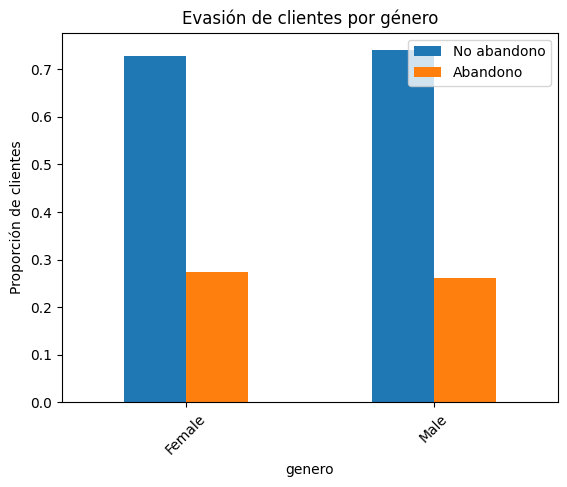

abandono_cliente,0,1
genero,,
Female,0.727,0.273
Male,0.74,0.26


In [103]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "genero",
    "Evasión de clientes por género"
)


#####Aunque la proporción de abandono es similar para ambos géneros, se puede ver una diferencia considerable, siendo el género femenino el que más abandonos presentó.


---



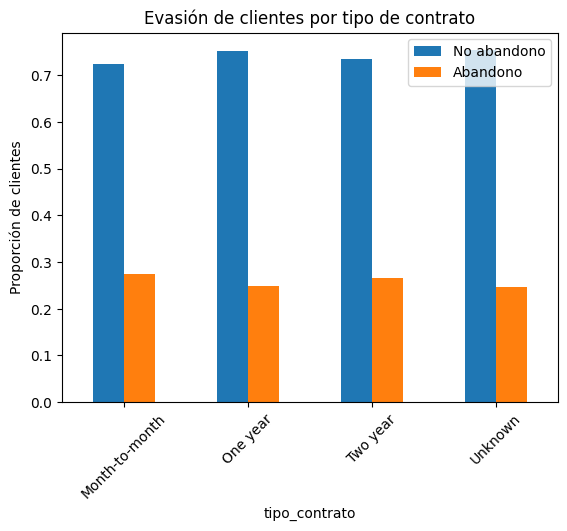

abandono_cliente,0,1
tipo_contrato,,
Month-to-month,0.725,0.275
One year,0.751,0.249
Two year,0.735,0.265
Unknown,0.754,0.246


In [102]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "tipo_contrato",
    "Evasión de clientes por tipo de contrato"
)

##### El tipo de contrato que presentó un mayor porcentaje de abandono de clientes fue el Month-to-month, mientras que los contratos más largos reducen ligeramente la probabilidad de abandono.Por lo tanto, el compromiso a largo plazo reduce la probabilidad de salida.


---



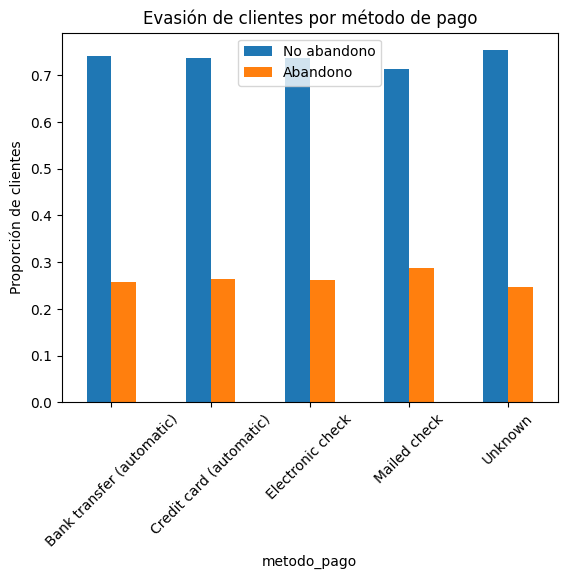

abandono_cliente,0,1
metodo_pago,,
Bank transfer (automatic),0.742,0.258
Credit card (automatic),0.737,0.263
Electronic check,0.737,0.263
Mailed check,0.713,0.287
Unknown,0.754,0.246


In [104]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "metodo_pago",
    "Evasión de clientes por método de pago"
)

##### Los métodos automáticos de pago reducen el abandono, como lo son la transferencia bancaria, cobro con a la cuenta bancaria. La opción de pago que torna a un mayor abandono por parte de los clientes es el método de cheque enviado por correo.


---



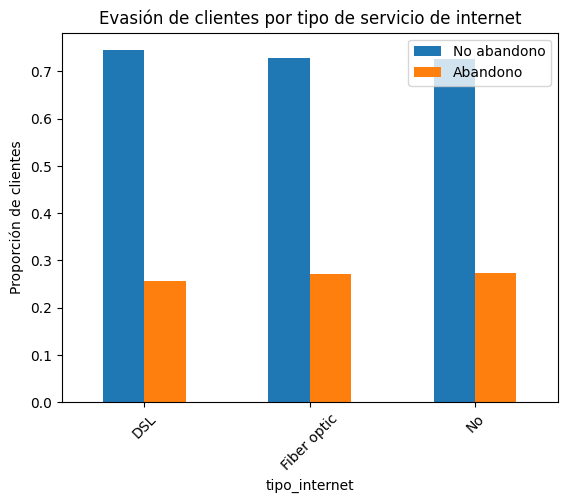

abandono_cliente,0,1
tipo_internet,,
DSL,0.745,0.255
Fiber optic,0.729,0.271
No,0.726,0.274


In [106]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "tipo_internet",
    "Evasión de clientes por tipo de servicio de internet"
)

#####Los clientes que tienen contratados el servicio de internet están divididos entre servicio tipo DSL y fibra óptica, de estos la categoría con más abandono son los clintes que tienen fibra óptica.


---



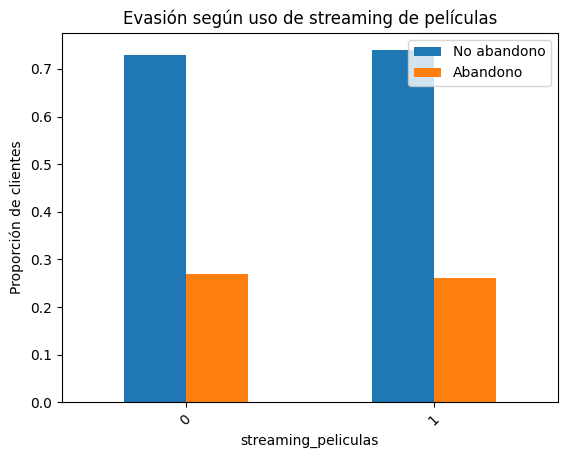

abandono_cliente,0,1
streaming_peliculas,,
0,0.73,0.27
1,0.739,0.261


In [107]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "streaming_peliculas",
    "Evasión según uso de streaming de películas"
)

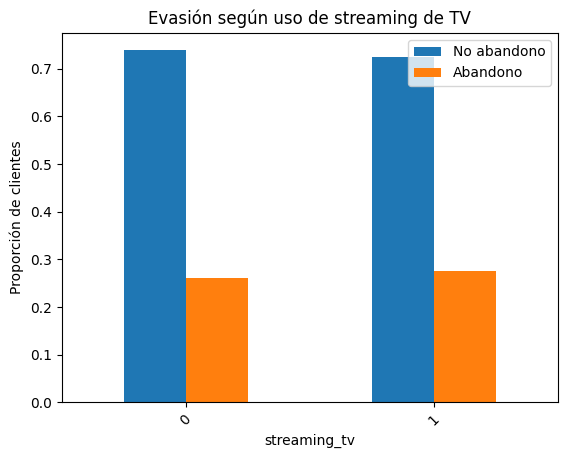

abandono_cliente,0,1
streaming_tv,,
0,0.739,0.261
1,0.725,0.275


In [108]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "streaming_tv",
    "Evasión según uso de streaming de TV"
)


In [109]:
df_sin_churn_desconocido["internet_streaming"] = (
    df_sin_churn_desconocido["tipo_internet"]
    + "_"
    + df_sin_churn_desconocido["streaming_peliculas"].astype(str)
    + df_sin_churn_desconocido["streaming_tv"].astype(str)
)

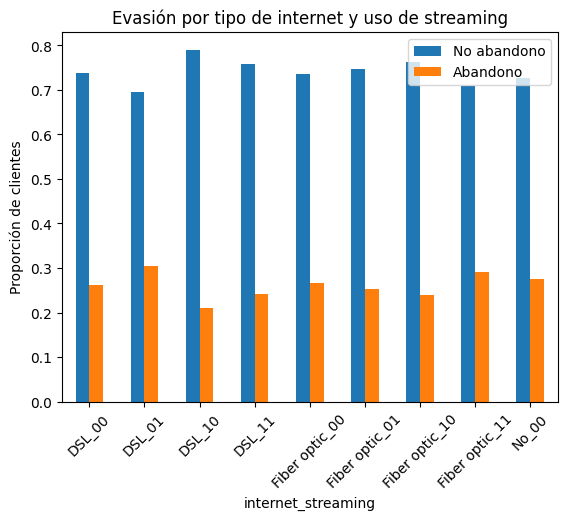

abandono_cliente,0,1
internet_streaming,,
DSL_00,0.737,0.263
DSL_01,0.695,0.305
DSL_10,0.79,0.21
DSL_11,0.758,0.242
Fiber optic_00,0.735,0.265
Fiber optic_01,0.748,0.252
Fiber optic_10,0.762,0.238
Fiber optic_11,0.708,0.292
No_00,0.726,0.274


In [110]:
churn_por_categoria(
    df_sin_churn_desconocido,
    "internet_streaming",
    "Evasión por tipo de internet y uso de streaming"
)

#####El análisis combinado revela que la evasión depende del tipo de conexión y del perfil de consumo digital. Mientras que en DSL los servicios de streaming reducen el abandono, en fibra óptica incluso los clientes con múltiples servicios presentan altas tasas de evasión, lo que sugiere problemas de expectativa, precio o calidad del servicio.


---



###Evasión por variables numéricas

In [116]:
df_sin_churn_desconocido[
    ["cargo_mensual", "cargo_total", "cargo_diario"]
].describe().T

,count,mean,std,min,25%,50%,75%,max
cargo_mensual,6830.0,64.947064,29.674278,18.250000,39.062500,70.350,89.550,118.750000
cargo_total,6830.0,2261.160706,2239.570666,0.000000,419.750000,1392.925,3706.250,8684.800000
cargo_diario,6830.0,2.164902,0.989143,0.608333,1.302083,2.345,2.985,3.958333


In [117]:
df_sin_churn_desconocido.groupby("abandono_cliente")[
    ["antiguedad_meses", "cargo_mensual", "cargo_diario"]
].mean()

,antiguedad_meses,cargo_mensual,cargo_diario
abandono_cliente,,,
0,32.687163,64.974416,2.165814
1,31.833059,64.871829,2.162394


In [118]:
df_sin_churn_desconocido.groupby("abandono_cliente")["antiguedad_meses"].describe()

,count,mean,std,min,25%,50%,75%,max
abandono_cliente,,,,,,,,
0,5009.0,32.687163,24.517650,0.0,9.0,29.0,56.0,72.0
1,1821.0,31.833059,24.656511,0.0,8.0,27.0,55.0,72.0


##### La antigüedad  por sí sola no discrimina bien el abandono del cliente, sim embargo el 25% de los clientes que abandonan tienen ≤ 8 meses, por los que el abandono temprano existe, aunque se oculte dentro de la media que es similar en ambas condiciones (clientes que permanecen y clientes que abandonan).


---



###Identificación de clientes de alto riesgo temprano

#####Con base al análisis general previo de la antigüedad, la mediana general de abandono es alrededor de los 28 a 29 meses, siendo relevante el primer cuartil de los 8 a 9 meses. Por lo tanto, los clientes tempranos (≤12 meses) son relevantes para este análisis.

In [120]:
df_sin_churn_desconocido["cliente_temprano"] = (
    df_sin_churn_desconocido["antiguedad_meses"] <= 12
).astype(int)

In [121]:
df_sin_churn_desconocido["cliente_temprano"].value_counts(normalize=True).round(3)

,proportion
cliente_temprano,
0,0.691
1,0.309


In [122]:
(
    df_sin_churn_desconocido
    .groupby("cliente_temprano")["abandono_cliente"]
    .mean()
    .round(3)
)

,abandono_cliente
cliente_temprano,
0,0.262
1,0.278


#####El abandono no ocurre únicamente en clientes nuevos, pero la probabilidad aumenta cuando la baja antigüedad se combina con contratos flexibles y baja adopción de servicios.

####Creación de un score simple de riesgo temprano

In [123]:
df_sin_churn_desconocido["riesgo_temprano"] = 0

# Cliente temprano
df_sin_churn_desconocido.loc[
    df_sin_churn_desconocido["cliente_temprano"] == 1,
    "riesgo_temprano"
] += 1

# Contrato mensual
df_sin_churn_desconocido.loc[
    df_sin_churn_desconocido["tipo_contrato"] == "Month-to-month",
    "riesgo_temprano"
] += 1

# Fibra óptica
df_sin_churn_desconocido.loc[
    df_sin_churn_desconocido["tipo_internet"] == "Fiber optic",
    "riesgo_temprano"
] += 1

# Sin streaming
df_sin_churn_desconocido.loc[
    (df_sin_churn_desconocido["streaming_tv"] == 0) &
    (df_sin_churn_desconocido["streaming_peliculas"] == 0),
    "riesgo_temprano"
] += 1

####Evaluar el score de riesgo

In [124]:
df_sin_churn_desconocido["riesgo_temprano"].value_counts().sort_index()


,count
riesgo_temprano,
0,777
1,2329
2,1724
3,1587
4,413


In [125]:
(
    df_sin_churn_desconocido
    .groupby("riesgo_temprano")["abandono_cliente"]
    .mean()
    .round(3)
)

,abandono_cliente
riesgo_temprano,
0,0.246
1,0.263
2,0.262
3,0.287
4,0.269


In [126]:
clientes_alto_riesgo = df_sin_churn_desconocido[
    (df_sin_churn_desconocido["cliente_temprano"] == 1) &
    (df_sin_churn_desconocido["riesgo_temprano"] >= 3)
]

In [127]:
clientes_alto_riesgo.shape
clientes_alto_riesgo["abandono_cliente"].mean().round(3)

np.float64(0.287)

In [128]:
clientes_alto_riesgo[[
    "antiguedad_meses",
    "tipo_contrato",
    "tipo_internet",
    "streaming_tv",
    "streaming_peliculas",
    "abandono_cliente"
]].head()

,antiguedad_meses,tipo_contrato,tipo_internet,streaming_tv,streaming_peliculas,abandono_cliente
2,4.0,Month-to-month,Fiber optic,0,0,1
4,3.0,Month-to-month,Fiber optic,1,0,1
8,7.0,Month-to-month,DSL,0,0,0
12,5.0,Month-to-month,Fiber optic,0,0,0
17,1.0,Month-to-month,Fiber optic,0,0,0


#####Estos resultados indican de manera complementaria el análisis realizado previamente, los clientes tempranos menores a 8 meses de antiguedad, con contrato de tipo mensual, con servicio de internet de tipo fibra óptica (frecuentemente) y poca adopción de servicios adicionales son los que concentran un mayor riesgo de abandono.

###Tabla de resumen: Churn por Score de riesgo

In [129]:
resumen_riesgo = (
    df_sin_churn_desconocido
    .groupby("riesgo_temprano")
    .agg(
        clientes=("abandono_cliente", "count"),
        tasa_abandono=("abandono_cliente", "mean")
    )
)

resumen_riesgo["tasa_abandono"] = resumen_riesgo["tasa_abandono"].round(3)

resumen_riesgo

,clientes,tasa_abandono
riesgo_temprano,,
0,777,0.246
1,2329,0.263
2,1724,0.262
3,1587,0.287
4,413,0.269


In [130]:
resumen_riesgo["%_clientes"] = (
    resumen_riesgo["clientes"] / resumen_riesgo["clientes"].sum() * 100
).round(2)

resumen_riesgo


,clientes,tasa_abandono,%_clientes
riesgo_temprano,,,
0,777,0.246,11.38
1,2329,0.263,34.1
2,1724,0.262,25.24
3,1587,0.287,23.24
4,413,0.269,6.05


In [131]:
resumen_riesgo = resumen_riesgo.reset_index().sort_values("riesgo_temprano")

resumen_riesgo


,riesgo_temprano,clientes,tasa_abandono,%_clientes
0,0,777,0.246,11.38
1,1,2329,0.263,34.1
2,2,1724,0.262,25.24
3,3,1587,0.287,23.24
4,4,413,0.269,6.05


#####Esta herramienta sencilla de clasificación, aunque no perfecta, ayuda a dislumbrar que el número de clientes que abandonaron es mayor conforme aumenta el riesgo (riesgo 3), lo cual funciona para priorizar las estrategias necesarias para el negocio.

#📄Informe final

**Introducción**
Análisis de Evasión de Clientes (Churn)
1. Objetivo del proyecto

El objetivo de este análisis fue comprender los factores asociados a la evasión de clientes (churn) y desarrollar una herramienta práctica de segmentación de riesgo temprano, que permita priorizar acciones de retención y apoyar la toma de decisiones estratégicas.


---



**Metodología**

El proyecto se desarrolló en cuatro etapas principales:

*   Preparación y limpieza de datos

Estandarización de variables binarias y categóricas.

Creación de variables derivadas clave, como cargo diario y cliente temprano.

Exclusión de registros con churn desconocido para evitar sesgos.

*   Análisis descriptivo

Evaluación de variables numéricas (antigüedad, cargos, gasto total).

Comparación de métricas entre clientes que abandonaron y los que permanecieron.

*   Análisis de evasión

Estudio del churn por tipo de contrato, servicios contratados, método de pago e internet.

Análisis combinado de servicios (internet y streaming).

Identificación de patrones de abandono temprano.

*   Construcción de un score de riesgo temprano

Segmentación de clientes en cinco niveles de riesgo (0 a 4).

Cálculo de tasa de abandono y distribución de clientes por nivel.


---



**Principales Hallazgos**

🔹 Comportamiento general de churn

La evasión está presente en todos los segmentos, lo que indica un fenómeno estructural del negocio.

La antigüedad promedio y los cargos mensuales son similares entre clientes que abandonan y los que no, lo que refuerza la importancia de factores contractuales y de servicio.

🔹 Factores asociados a mayor evasión

Contratos mensuales (Month-to-month) presentan consistentemente mayores tasas de churn.

Menor adopción de servicios de valor agregado (seguridad, soporte técnico, respaldos).

Clientes con baja antigüedad muestran una mayor probabilidad de abandono temprano.

🔹 Score de riesgo temprano

El score permite ordenar a los clientes según su propensión al abandono, aunque no actúa como un clasificador perfecto.

El segmento riesgo 3 concentra:

La mayor tasa de abandono (≈ 28.7%)

Un volumen relevante de clientes (≈ 23% del total)

El segmento riesgo 4, aunque con churn elevado, representa una base pequeña (≈ 6%).


---




**Recomendaciones**
*   Corto plazo

Implementar acciones proactivas de retención para clientes de riesgo 3:

Migración a contratos de mayor duración.

Incentivos por bundle de servicios.

Seguimiento durante los primeros 6 meses.

*   Mediano plazo

Diseñar estrategias específicas para clientes de riesgo 4, mediante análisis cualitativo.

Fortalecer la adopción de servicios de valor agregado en clientes tempranos.


---
**Conclusión final**

El proyecto permitió transformar datos históricos en insights accionables, identificando patrones claros de evasión y desarrollando un score interpretable y operativo para la gestión temprana del churn.
Este enfoque constituye una base sólida para optimizar estrategias de retención, mejorar la experiencia del cliente y reducir la pérdida de ingresos en el mediano plazo.
